In [2]:
### ATOC5860 - covariance_matrix_example
## coded by Dr. Vineel Yettella (Ph.D. ATOC 2019, now working at Apple)
## Last updated February 9 2022

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### 1) Construct the sample covariance matrix of three normally distributed random variables x1, x2 and x3. Then plot it.  "Look at your data"!


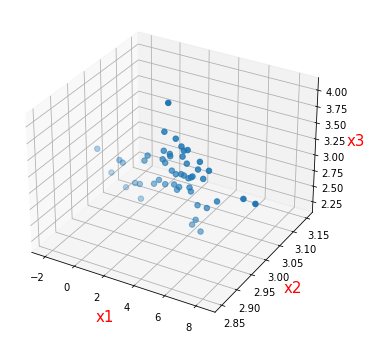

In [3]:
#Choose the number of samples M
M = 50 ## intially 50 -- second time through try 10000

#Set population parameters of the joint distribution of x1, x2, x3
variance_x1 = 4
variance_x2 = 0
variance_x3 = 0.1
mean_x1 = 3
mean_x2 = 10
mean_x3 = 5

#specified correlations between -1 and 1 to construct a valid covariance matrix
rho12 = 0.8
rho23 = 0.4
rho13 = 0.1

#create the population covariance matrix
covariance_matrix = [[variance_x1, rho12*np.sqrt(variance_x1*variance_x2), rho13*np.sqrt(variance_x1*variance_x3)], 
                     [rho12*np.sqrt(variance_x1*variance_x2), variance_x2, rho23*np.sqrt(variance_x2*variance_x3)],
                     [rho13*np.sqrt(variance_x1*variance_x3), rho23*np.sqrt(variance_x2*variance_x3), variance_x3]]
covariance_matrix = np.around(covariance_matrix, decimals=3)

means = [mean_x1, mean_x1, mean_x1]
means = np.around(means, decimals=3)

#simulate
x1, x2, x3 = np.random.multivariate_normal(means, covariance_matrix, M).T

#plot x1, x2, x3
fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')
ax.scatter(x1, x2, x3, s = 30)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.xaxis.label.set_color('red')
ax.yaxis.label.set_color('red')
ax.zaxis.label.set_color('red')
ax.xaxis.label.set_fontsize(15)
ax.yaxis.label.set_fontsize(15)
ax.zaxis.label.set_fontsize(15)

### 2) Calculate the sample covariance matrix and compare it to the population covariance matrix:

In [4]:
#construct data matrix X
X = pd.DataFrame({'x1':x1, 'x2':x2, 'x3':x3})

#print a few samples
print(X.shape)
X.head(n=np.min([M, 5]))

(50, 3)


,x1,x2,x3
0,3.660995,3.0,3.302185
1,1.736497,3.0,2.750865
2,0.760951,3.0,2.678754
3,4.886701,3.0,2.211746
4,5.286388,3.0,2.614018


In [5]:
#remove column means from each column of X to get anomaly matrix
X_anomaly = X - np.mean(X)

#Compute sample covariance matrix from the anomaly matrix
C = (1/(M-1))*np.dot(X_anomaly.T, X_anomaly)

#Alternatively, you could use numpy's covariance function
#C = np.cov(X, rowvar=False)

print('\n')
print('Population covariance matrix:')
print(covariance_matrix)

print('\n')
print('Sample covariance matrix:')
print(C)



Population covariance matrix:
[[4.    0.    0.063]
 [0.    0.    0.   ]
 [0.063 0.    0.1  ]]


Sample covariance matrix:
[[4.25947646 0.         0.0099301 ]
 [0.         0.         0.        ]
 [0.0099301  0.         0.12103015]]


### 3) Go Back to the Top.  Try increasing M and repeat. You will find that as M increases, the sample covariance matrix converges to the population covariance matrix.